In [1]:
#general settings
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytimber
from pytimber import BWS

In [3]:
db = pytimber.LoggingDB()

In [4]:
t1=pytimber.parsedate("2018-10-25 04:34:00.000")
t2=pytimber.parsedate("2018-10-25 12:08:00.000")

# Getting the BWS data from timber

generate the BWS instance, which automatically calculates the emittances and beam profiles using the data stored in timber.

In [5]:
bws = BWS(db=db, beam='B1', t_start=t1, t_end=t2)
data = bws.get_timber_data(t1, t2)

In [16]:
bws = BWS.fromdb(t1, t2, beam='B1', db=db, verbose=True)

... extracting data from timber
... generating dictionary


get the data:
* the first element contains the dataframe compatible data, i.e. a dict[plane][direction] --> MultiIndex DataFrame
                   gain, egev, beta, emit
    time, slot
      1   0
          1
      2   0
          1
  For help with MultiIndex DataFrame see: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
          
* The second element contains dict[plane][direction] --> dict[time] --> [slot, pos, amp]

In [17]:
data_df = bws.data[0]
data_dict = bws.data[1]

Fitting gaussians to data
* the first element contains the dataframe compatible data, i.e. a dict[plane][direction] --> MultiIndex DataFrame
                   emit_gauss, emit_gauss_err
    time, slot
      1   0
          1
      2   0
          1
  For help with MultiIndex DataFrame see: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
          
* The second element contains dict[plane][direction] --> dict[time] --> [slot, amp_norm, p_gauss, pcov_gauss]

In [8]:
data_fit_df, data_fit_dic = bws.fit_gaussian()

What slots do we have?

In [11]:
slots = np.unique((data_df['H']['IN'].index.get_level_values(1)))
print(slots)

[   0   18   19   20   21   22   23   24   25   26   27   28   29   61
   62   63   64   65   66   67   68   69   70   71   72   73   74   75
   76   77   78   79   80   81   82   83   84   85   86   87   88   89
   90   91   92   93   94   95   96   97   98   99  100  101  102  103
  104  105  106  107  108  116  117  118  119  120  121  122  123  124
  125  126  127  128  129  130  131  132  133  134  135  136  137  138
  139  140  141  142  143  144  145  146  147  148  149  150  151  152
  153  154  155  156  157  158  159  160  161  162  163  200  201  202
  203  204  205  206  207  208  209  210  211  503  628  629  630  631
  632  633  634  635  636  637  638  639  640  641  642  643  644  645
  646  647  648  649  650  651  652  653  654  655  656  657  658  659
  660  661  662  663  664  665  666  667  668  669  670  671  672  673
  674  675 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827
 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841
 1842 

What timestamps do we have ?

In [13]:
ts = np.unique(data_df['H']['IN'].index.get_level_values(0))
print(ts)

[1.54043695e+09 1.54043709e+09 1.54044331e+09 1.54044344e+09
 1.54044681e+09 1.54044692e+09 1.54044696e+09 1.54045509e+09
 1.54045518e+09]


# Some plotting examples:

plotting the emittances, both the %.APP.%:EMITTANCE_NORM and the emittance calculated from the gaussian fitting, of the different slots for a given timestamp

<IPython.core.display.Javascript object>


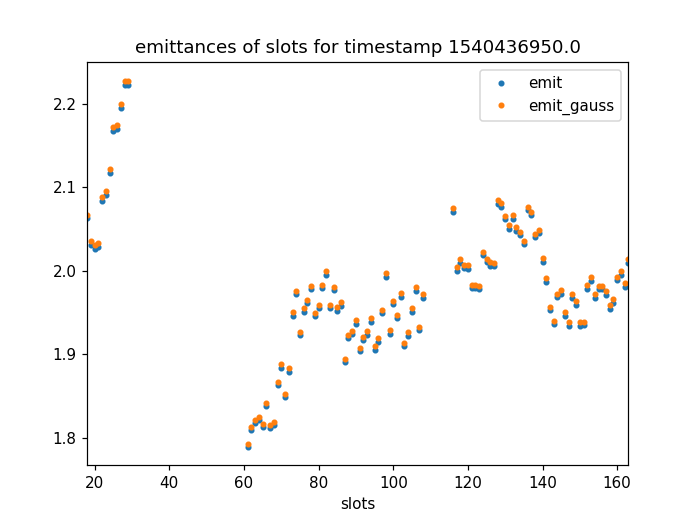

In [14]:
plt.figure()
ax = data_df['H']['IN'].loc[ts[3]]['emit'].plot(linewidth=0, marker='.', label='emit')
ax = data_fit_df['H']['IN'].loc[ts[3]]['emit_gauss'].plot(linewidth=0, marker='.', label='emit_gauss')
plt.title('emittances of slots for timestamp {}'.format(ts[0]))
plt.legend()
plt.show()

plotting the emittances of the slots through time

<IPython.core.display.Javascript object>


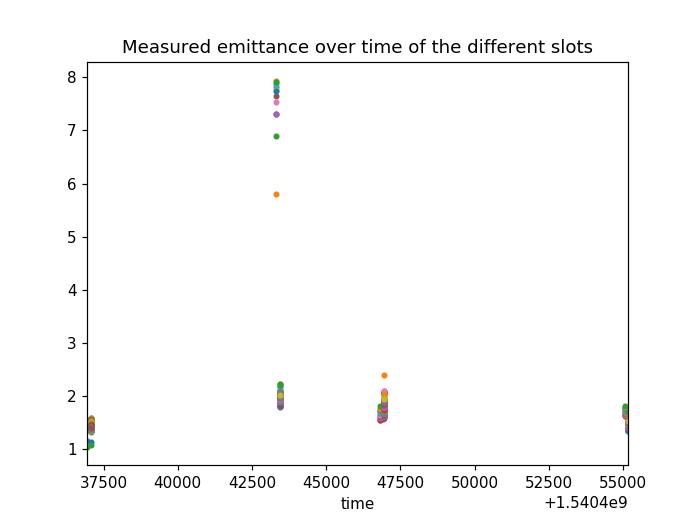

In [15]:
plt.figure()
idx = pd.IndexSlice
for sl in slots:
    data_df['H']['IN'].loc[idx[:, sl], :].droplevel(1)['emit'].plot(label=sl, linewidth=0, marker='.')
plt.title('Measured emittance over time of the different slots')
# plt.legend()
plt.show()